In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [8]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

1. Attribute Information:
    * MedInc  -      median income in block
    * HouseAge  -    median house age in block
    * AveRooms   -   average number of rooms
    * AveBedrms  -   average number of bedrooms
    * Population -   block population
    * AveOccup  -    average house occupancy
    * Latitude  -   house block latitude
    * Longitude -   house block longitude
2. Missing Attribute Values: None

In [19]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
X, y = fetch_california_housing(return_X_y=True)

In [28]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [29]:
data = pd.DataFrame(X,columns = housing.feature_names)  #can use housing.data in place of X 

In [30]:
data['target'] = housing.target

In [31]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## EDA

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


* No missing values present

In [33]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:>

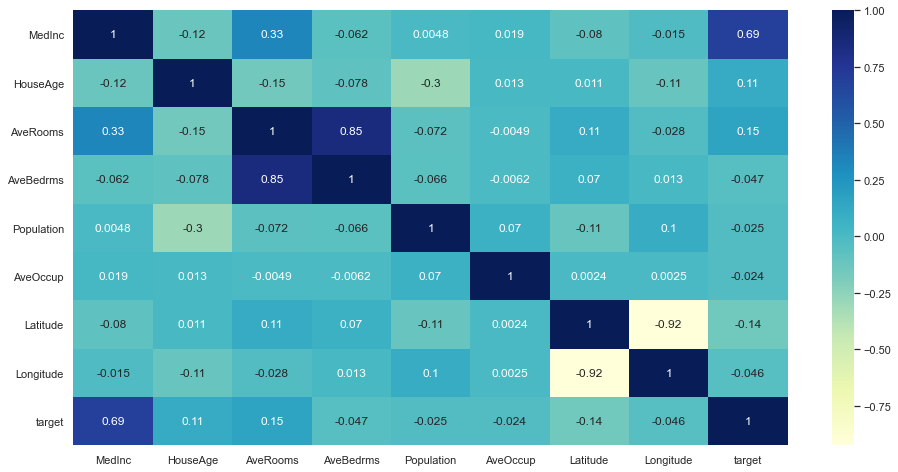

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

* Places where median income is high, prices are also high.
* Avg rooms and avg bedrooms are correlated
* Latitiue and longitude are inversely correlated

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

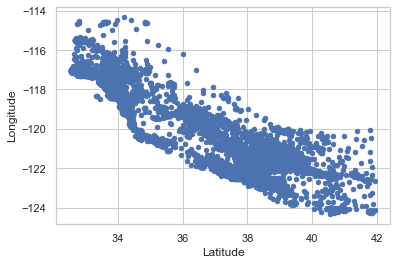

In [53]:
data[['Latitude','Longitude']].plot(kind='scatter', x='Latitude', y='Longitude')

Inverse correlation of latitude and longitude is just a coincidence because of geographical location of California

In [55]:
X= data.drop('target',axis=1)
y= data['target']

In [56]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [57]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipe = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])

In [60]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [61]:
pipe.score(X_train, y_train)

0.6109633715458154

In [62]:
pipe.score(X_test, y_test)

0.5911695436410489

In [67]:
pipe['reg'].coef_

array([ 0.83189945,  0.1209374 , -0.26175157,  0.30405212, -0.00873559,
       -0.02984442, -0.89236538, -0.86385031])

In [68]:
pipe['reg'].intercept_

2.0743726279069783

In [69]:
pred = pipe.predict(X_test)

In [70]:
pred

array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

## Assumptions

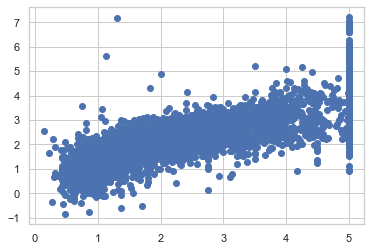

In [71]:
## plot a scatter plot for the prediction
plt.scatter(y_test,pred)

In [72]:
## Residuals
residuals=y_test-pred

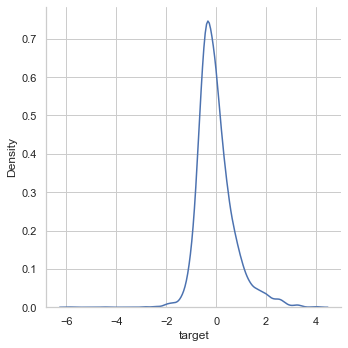

In [73]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

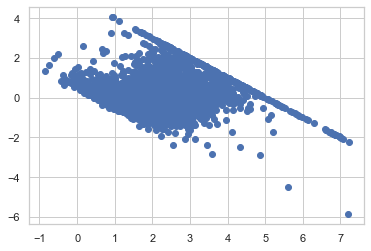

In [74]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(pred,residuals)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

pipe1 = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(random_state=0, max_depth=10))])

In [105]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeRegressor(max_depth=10, random_state=0))])

In [106]:
pipe1.score(X_train, y_train)

0.8369838179078153

In [107]:
pipe1.score(X_test, y_test)

0.6763215018503471

In [108]:
pred1 = pipe1.predict(X_test)

In [109]:
pred1

array([1.51773381, 2.87203191, 1.61436842, ..., 2.13238298, 2.45074684,
       2.70374194])

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))

0.433011006440152
0.4278546345105464
0.6541059810998111


In [111]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred1)
print(score)

0.6763215018503471


In [112]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6758187979122385

In [116]:
pipe1.predict(housing.data[0].reshape(1,-1))

array([4.85931462])

In [117]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [118]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [119]:
import pickle

In [120]:
pickle.dump(pipe1,open('model.pkl','wb'))

In [121]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [122]:
pickled_model.predict(housing.data[0].reshape(1,-1))

array([4.85931462])